In [3]:
def hello_world(name:str):
    print(f"hello {name}")
    print(f"{name} is working hard in CASD")


In [4]:
hello_world("Elias")

hello Elias
Elias is working hard in CASD


In [5]:
hello_world("pengfei")

hello pengfei
pengfei is working hard in CASD


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist # 28*28 image of handwritten digits of 0-9
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:

print(y_train[0])

5


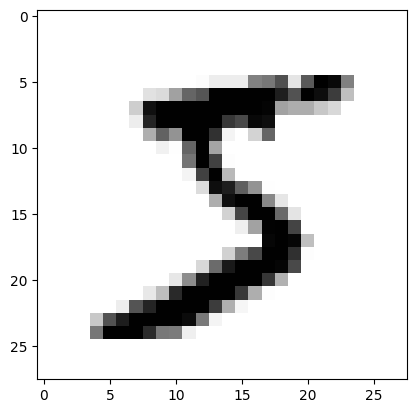

In [5]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

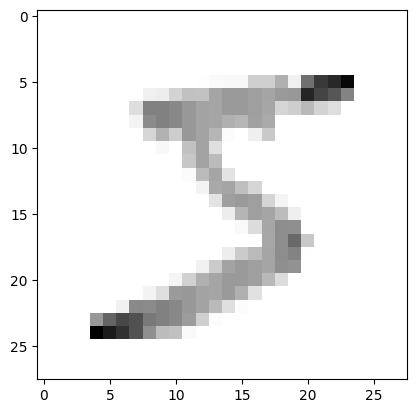

In [6]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

# check data after normalization
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
model=tf.keras.models.Sequential()
# Build Input layer, the number of neuron must be equal to the number of input 28*28=784
model.add(tf.keras.layers.Flatten())
# Build hidden layer, the activation function here is rectified linear unit y=max(0,x)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# Build output layer, the number of the neuron here must equal to the number of possible result. In this model it's
# 10. As the output is not binary, we need to use softmax.
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
model.fit(x_train,y_train,epochs=3,batch_size=100)

Epoch 1/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 0.3295
Epoch 2/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1259
Epoch 3/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0865


In [10]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9699 - loss: 0.0958
0.0957506000995636 0.9699000120162964


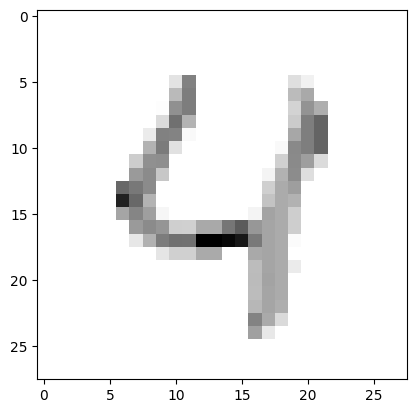

In [11]:
img = x_test[4]                    # shape (28, 28)
plt.imshow(img, cmap=plt.cm.binary)
plt.show()


In [12]:
# The model expects shape (1, 28, 28), so expand dims
img_reshaped = np.expand_dims(img, axis=0)

pred = model.predict(img_reshaped)
digit = np.argmax(pred)

print("The model predicted digit is:", digit)
print("Probability vector:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The model predicted digit is: 4
Probability vector: [[4.4243015e-07 1.7532076e-06 1.3629900e-04 2.4237984e-06 9.9639124e-01
  2.4545510e-05 3.3188558e-06 6.3720072e-04 7.4291188e-06 2.7954597e-03]]


In [13]:
def predict_number(image_index:int):
    img = x_test[image_index]                    # shape (28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    img_reshaped = np.expand_dims(img, axis=0)

    pred = model.predict(img_reshaped)
    digit = np.argmax(pred)

    print("The model predicted digit is:", digit)
    print("Probability vector:", pred)

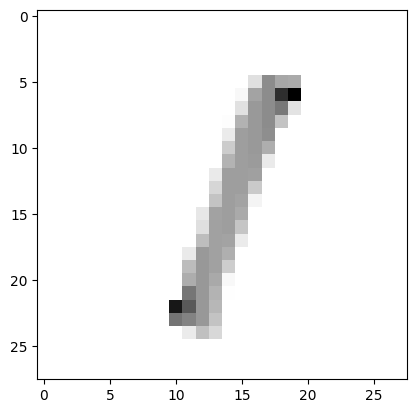

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The model predicted digit is: 1
Probability vector: [[2.6962189e-05 9.9605221e-01 9.9002609e-05 7.9145711e-06 1.8585930e-04
  2.7799842e-05 1.3508805e-04 3.2383893e-03 2.2023777e-04 6.4736719e-06]]


In [14]:
predict_number(5)